### Zadanie 1

In [18]:
import numpy as np
import matplotlib.pyplot as plt

years = np.array([i for i in range(1900, 1981, 10)],
                 # Apparently overflows without it
                  dtype=np.double)

population = np.array([
    76212168,
    92228496,
    106021537,
    123202624,
    132164569,
    151325798,
    179323175,
    203302031,
    226542199])

In [19]:
#coefficients array
C = np.empty(7, dtype=np.ndarray)

for i in range(0, 7):
    A = np.vander(years, i + 1, increasing=True)
    AT = np.transpose(A)
    C[i] = np.linalg.solve(np.matmul(AT, A), np.dot(AT, population))

### Ekstrapolacja

Wynik może się różnić od komputera, może nawet się zdarzyć że na innym urządzeniu wielomiany innego stopnia dadzą najlepsze wyniki

In [24]:
reference_value = 248709873
year_for_extrapolation = 1990

extrapolate = np.empty(len(C), dtype=np.double)
rel_error = np.empty(len(C), dtype=np.double)


for i in range(len(C)):
    extrapolate[i] = np.polyval(C[i][::-1], year_for_extrapolation)
    rel_error[i] = abs(reference_value - extrapolate[i]) / reference_value
    print(f"Stopień wielomianu: {i}, wartość ekstrapolowana: {round(extrapolate[i])}, błąd względny ekstrapolacji: {round(rel_error[i], 3)}")

real_min = np.argmin(rel_error)
print(f"Najmniejszy błąd względny występuje przy interpolacji wielomianami stopnia {real_min}")

Stopień wielomianu: 0, wartość ekstrapolowana: 143369177, błąd względny ekstrapolacji: 0.424
Stopień wielomianu: 1, wartość ekstrapolowana: 235808109, błąd względny ekstrapolacji: 0.052
Stopień wielomianu: 2, wartość ekstrapolowana: 254712945, błąd względny ekstrapolacji: 0.024
Stopień wielomianu: 3, wartość ekstrapolowana: 261439111, błąd względny ekstrapolacji: 0.051
Stopień wielomianu: 4, wartość ekstrapolowana: 251719359, błąd względny ekstrapolacji: 0.012
Stopień wielomianu: 5, wartość ekstrapolowana: 259115342, błąd względny ekstrapolacji: 0.042
Stopień wielomianu: 6, wartość ekstrapolowana: 249510782, błąd względny ekstrapolacji: 0.003
Najmniejszy błąd względny występuje przy interpolacji wielomianami stopnia 6


### Obliczanie kryterium informacyjnego Akaikego

In [25]:
predictions_all_years = np.empty(7, dtype=np.ndarray)
aic = np.empty(7, dtype=np.double)

# n = 9
for i in range(7):
    predictions_all_years[i] = np.polyval(C[i][::-1], years)
    # formula from lab5.pdf
    aic[i] = 2*(i+1) + 9 * np.log(np.sum((population - predictions_all_years[i])**2) / 9) + (2 * (i+1) * (i+2)) / (9 - i)
    print(f"Kryterium Akaikego dla m = {i}: {aic[i]}")


aic_m_min = np.argmin(aic)

print(f"Najmniejsze dla m = {aic_m_min}")

Kryterium Akaikego dla m = 0: 320.883990926215
Kryterium Akaikego dla m = 1: 288.5564781232789
Kryterium Akaikego dla m = 2: 278.0819453251622
Kryterium Akaikego dla m = 3: 281.54706835498763
Kryterium Akaikego dla m = 4: 284.6723882277528
Kryterium Akaikego dla m = 5: 298.8279926203794
Kryterium Akaikego dla m = 6: 313.2645598834567
Najmniejsze dla m = 2


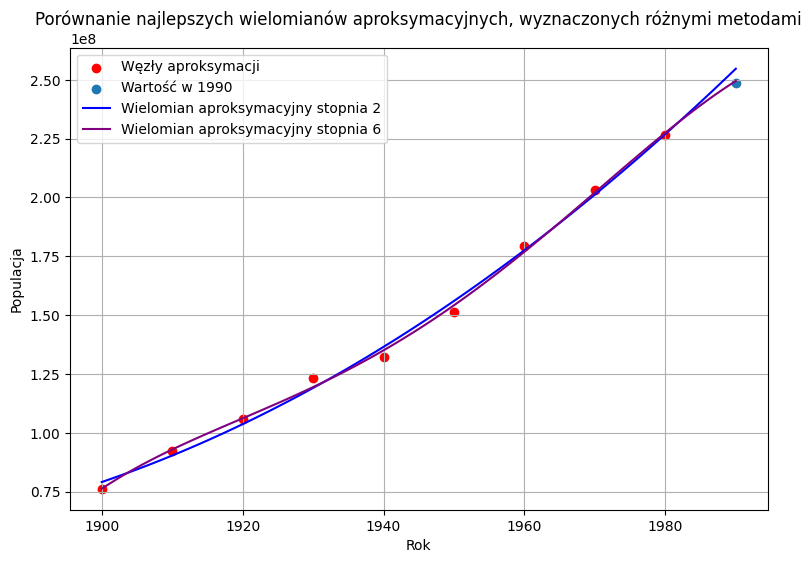

In [32]:
xs = np.arange(1900, 1991, 1)
plt.figure(figsize=(9, 6))
plt.scatter(years, population, label="Węzły aproksymacji", color="red")
plt.scatter(1990, reference_value, label="Wartość w 1990")
plt.plot(xs, np.polyval(C[aic_m_min][::-1], xs), label=f"Wielomian aproksymacyjny stopnia {aic_m_min}", color="blue")
if aic_m_min != real_min:
    plt.plot(xs, np.polyval(C[real_min][::-1], xs), label=f"Wielomian aproksymacyjny stopnia {real_min}", color="purple")
plt.legend()
plt.title("Porównanie najlepszych wielomianów aproksymacyjnych, wyznaczonych różnymi metodami")
plt.grid()
plt.xlabel("Rok")
plt.ylabel("Populacja")

plt.show()

### Zadanie 2

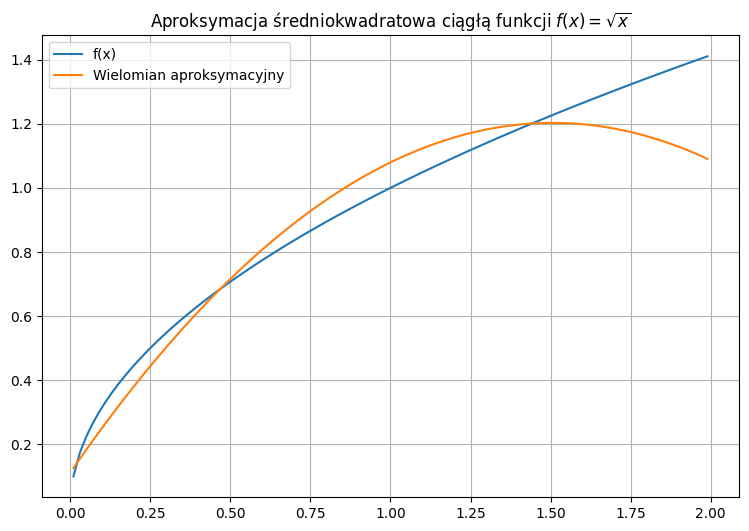

In [49]:
# Approximation with second degree polynomials
# All formulas are explained in lab5-intro.pdf

def f(x):
    return np.sqrt(x)

# Weight function for Chebyshev polynomials on [0, 2] interval
def weight(t):
    return (1 - (t-1)**2) ** (-0.5)

def cheb(x, n):
    # n - degree of the polynomial
    # since we are using only 3 of them,
    # it's cheap to calculate them analytically
    match n:
        # (x - 1) because of our interval
        case 0: return 1
        case 1: return x - 1
        case 2: return 2 * (x-1)**2 - 1


def inner_prod_cheb(n):
    if n == 0:
        return np.pi
    else:
        return np.pi / 2

def eval_apprx_poly(c, x):
    res = 0
    for i in range(len(c)):
        res += c[i] * cheb(x, i)

    return res

c = np.empty(3)
# slightly cut interval to avoid division by 0
xs = np.linspace(0.01, 1.99, 100)
for i in range(3):
    c[i] = np.trapezoid(weight(xs)*f(xs)*cheb(xs, i), xs) / inner_prod_cheb(i)

plt.figure(figsize=(9, 6))
plt.plot(xs, f(xs), label="f(x)")
plt.plot(xs, eval_apprx_poly(c, xs), label="Wielomian aproksymacyjny")
plt.grid()
plt.legend()
plt.title(r"Aproksymacja średniokwadratowa ciągłą funkcji $f(x) = \sqrt{x}$")
plt.show()